In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
compression = []
with open("index_compressing/compression_2") as f:
    for line in f:
        tokens = line.strip().split('\t')
        compression.append(float(tokens[1]))

In [3]:
len(compression)

534100

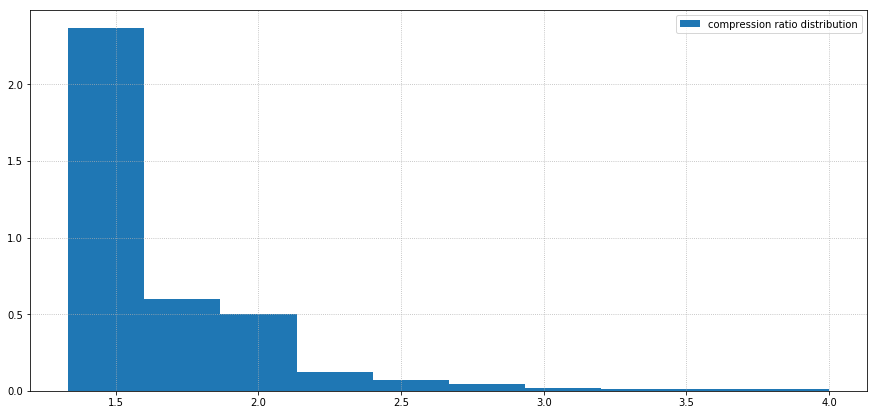

In [10]:
plt.figure(figsize=(15, 7))
plt.hist(compression, density=True, bins=10, label='compression ratio distribution')
plt.grid(ls=':')
plt.legend()
plt.show()

Очень много слов для которых постинг листы очень короткие или вообще состоят из 1 документа поэтому на них сжатие слабое

In [11]:
import os

In [14]:
print('Initial index size: ', os.path.getsize('index_compressing/index'))
print('Compressed index size: ', os.path.getsize('index_compressing/index_2'))
print('Compression: ', os.path.getsize('index_compressing/index') / os.path.getsize('index_compressing/index_2'))

Initial index size:  97657696
Compressed index size:  29279016
Compression:  3.335415916983002


In [15]:
word_to_comp = {}
with open("index_compressing/compression_2") as f:
    for line in f:
        tokens = line.strip().split('\t')
        compression = float(tokens[1])
        cnt = float(tokens[2])
        if cnt > 100:
            word_to_comp[tokens[0]] = compression

In [16]:
len(word_to_comp)

15222

In [17]:
word_to_comp['home']

3.96448

In [19]:
from collections import Counter

In [20]:
cnt = Counter(word_to_comp)

In [22]:
cnt.most_common(20)

[('the', 4.0),
 ('under', 4.0),
 ('hererelated', 4.0),
 ('be', 4.0),
 ('pagespermanent', 4.0),
 ('startsimple', 4.0),
 ('jump', 4.0),
 ('pdfpage', 4.0),
 ('linkpage', 4.0),
 ('changesshow', 4.0),
 ('encyclopedia', 4.0),
 ('informationwikidata', 4.0),
 ('changesupload', 4.0),
 ('other', 4.0),
 ('from', 4.0),
 ('on', 4.0),
 ('english', 4.0),
 ('and', 4.0),
 ('printing', 4.0),
 ('by', 4.0)]

In [23]:
anty_cnt = Counter({word: -c for word, c in word_to_comp.items()})

In [24]:
anty_cnt.most_common(20)

[('accomplished', -2.07725),
 ('ruin', -2.0793),
 ('bags', -2.08219),
 ('contributing', -2.09205),
 ('peterson', -2.09326),
 ('pictorial', -2.10204),
 ('sands', -2.10309),
 ('employs', -2.11168),
 ('prompted', -2.11399),
 ('sake', -2.12093),
 ('emerge', -2.12245),
 ('diploma', -2.12371),
 ('inter', -2.12371),
 ('prestigious', -2.12625),
 ('pants', -2.12632),
 ('diamonds', -2.12766),
 ('teens', -2.12844),
 ('imagination', -2.13084),
 ('prepares', -2.13333),
 ('seemingly', -2.13333)]

Мне кажется, что слова которые сжимаются хорошо, встречаются почти во всех документах, поэтому дельты получаюся маленькие и постинг сжимается хорошо

Другие же слова не такие частые, поэтому дельты получаюся больше